# Task 4: Insurance Charges Prediction
Linear Regression model to predict medical insurance charges based on features like age, BMI, and smoking status.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
# Load the dataset
df = pd.read_csv('../data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Data Cleaning and Preparation

In [4]:

# Check for missing values
print(df.isnull().sum())

# Encode categorical variables
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
df['sex'] = df['sex'].map({'male': 1, 'female': 0})
df = pd.get_dummies(df, columns=['region'], drop_first=True)


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


###  Exploratory Data Analysis (EDA)

#### 1. BMI vs Insurance Charges

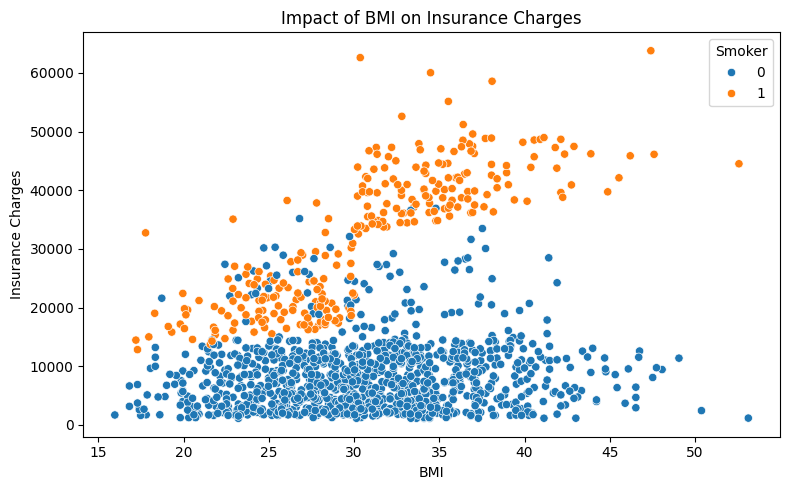

In [5]:

plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker')
plt.title('Impact of BMI on Insurance Charges')
plt.xlabel('BMI')
plt.ylabel('Insurance Charges')
plt.legend(title='Smoker')
plt.tight_layout()
plt.show()


 **Explanation**:
 The above Graph shows:
- For **non-smokers**, insurance charges increase slowly as BMI rises.  
- For **smokers**, the charges increase sharply, especially with high BMI.  
- It means overweight and smoking together greatly increase insurance costs.


#### 2. Age vs Insurance Charges

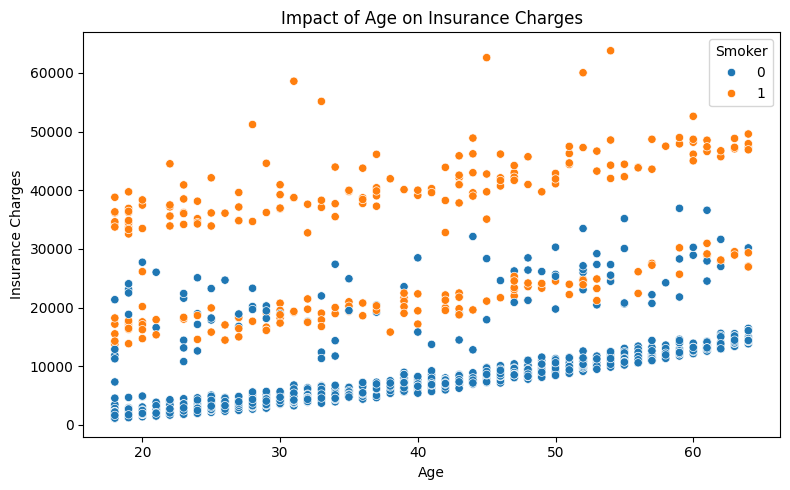

In [6]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='age', y='charges', hue='smoker')
plt.title('Impact of Age on Insurance Charges')
plt.xlabel('Age')
plt.ylabel('Insurance Charges')
plt.legend(title='Smoker')
plt.tight_layout()
plt.show()


 **Explanation**:The above Graph shows  
- As people get older, their insurance charges usually go higher.
- This happens even more for people who smoke.
- Older people are more likely to have health problems, so they cost more to insure.

#### 3. Smoking Status vs Insurance Charges

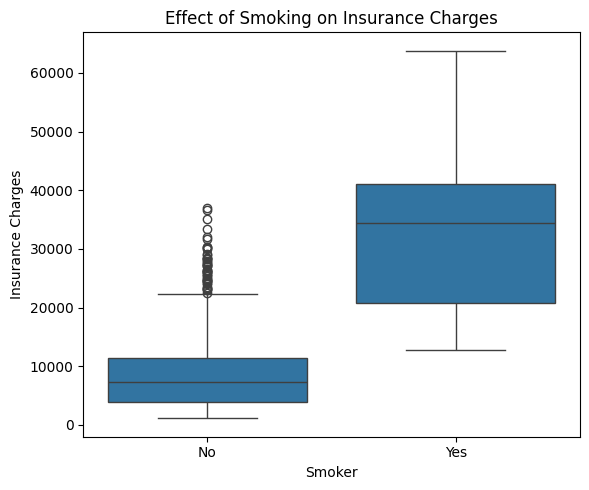

In [7]:
plt.figure(figsize=(6,5))
sns.boxplot(data=df, x='smoker', y='charges')
plt.title('Effect of Smoking on Insurance Charges')
plt.xlabel('Smoker')
plt.ylabel('Insurance Charges')
plt.xticks([0, 1], ['No', 'Yes'])
plt.tight_layout()
plt.show()


✅ **Explanation**:  
- Smokers pay much higher insurance charges than non-smokers.  
- On average, smokers' charges are **more than double**.  
- Smoking increases health risks, so insurers predict higher costs.



### Feature Engineering

To improve the model's performance, we added new features:
- age_smoker: Combines age and smoking status.
- bmi_smoker: Combines BMI and smoking status.
- These help the model understand how age or BMI affect charges **differently for smokers**.
  
- age_squared and bmi_squared: Help capture **nonlinear relationships** between age/BMI and insurance charges.

These new features can help the model make better predictions by learning more complex patterns in the data.


In [14]:

# ✅ Feature Engineering: Add interaction and polynomial features
df['age_smoker'] = df['age'] * df['smoker']
df['bmi_smoker'] = df['bmi'] * df['smoker']
df['age_squared'] = df['age'] ** 2
df['bmi_squared'] = df['bmi'] ** 2


In [15]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,age_smoker,bmi_smoker,age_squared,bmi_squared
0,19,0,27.900,0,1,16884.92400,False,False,True,19,27.9,361,778.410000
1,18,1,33.770,1,0,1725.55230,False,True,False,0,0.0,324,1140.412900
2,28,1,33.000,3,0,4449.46200,False,True,False,0,0.0,784,1089.000000
3,33,1,22.705,0,0,21984.47061,True,False,False,0,0.0,1089,515.517025
4,32,1,28.880,0,0,3866.85520,True,False,False,0,0.0,1024,834.054400


###  Model Training

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Define features and target
X = df.drop('charges', axis=1)
y = df['charges']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

###  Model Evaluation

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE): ${mae:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:.2f}")


Mean Absolute Error (MAE): $2711.67
Root Mean Squared Error (RMSE): $4505.52


###  Simple Interpretation

- **MAE**: The model is usually off by about $2,711 when predicting charges.

- **RMSE**: The average error is around $4,506, and it gives more importance to bigger mistakes.

- **Smaller** values mean the model is making more accurate predictions.